# Project 3:Sentiment analysis- e-commerce

**Problem Statement:** Build a sentiment analysis on twitter dataset using any deep learning technique.

- **Dataset:** https://www.kaggle.com/datasets/kazanova/sentiment140




In [2]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [3]:
!kaggle datasets download -d kazanova/sentiment140

Dataset URL: https://www.kaggle.com/datasets/kazanova/sentiment140
License(s): other
 70% 57.0M/80.9M [00:00<00:00, 214MB/s]
100% 80.9M/80.9M [00:00<00:00, 209MB/s]


In [4]:
!unzip sentiment140.zip

Archive:  sentiment140.zip
  inflating: training.1600000.processed.noemoticon.csv  


In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer



from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


import re

print("Tensorflow Version",tf.__version__)


Tensorflow Version 2.15.0


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [5]:
df = pd.read_csv('/content/training.1600000.processed.noemoticon.csv',
                 encoding = 'latin',header=None)
df.sample(6).style.set_properties(**{'background-color': '#f9f9f9', 'color': '#4CAF50', 'font-weight': 'bold'})

,0,1,2,3,4,5
1454353,4,2063315239,Sun Jun 07 02:10:09 PDT 2009,NO_QUERY,shellrawlins,@annieqpr morning did you have a good night?
489317,0,2182936011,Mon Jun 15 13:49:51 PDT 2009,NO_QUERY,melly_27_,"trying to tone up for my hols, why is it i lose weight when i don't mean to and put it on when i don't want to"
1428123,4,2059513963,Sat Jun 06 17:05:11 PDT 2009,NO_QUERY,randytho,"@drcdiva well yes it was both of those things, but in the big scheme of things was still just a party"
498024,0,2186073655,Mon Jun 15 18:19:05 PDT 2009,NO_QUERY,AshMeansAsh,"Wichitas current weather conditions: severe thunderstorm warning, tornado watch, & flash flood watch, Untill 10pm CST. Cuddle time?"
1503149,4,2071889086,Sun Jun 07 20:04:36 PDT 2009,NO_QUERY,musiclove18,@mrs_nickj07 I know eep! I can't wait for one more day....
661611,0,2243245670,Fri Jun 19 13:12:21 PDT 2009,NO_QUERY,biaheitzmann,@thastephanie QUERO BOLO THAAAA


In [6]:
df.columns = ['sentiment', 'id', 'date', 'query', 'user_id', 'text']
df.head().style.set_properties(**{'background-color': '#f9f9f9', 'color': '#4CAF50', 'font-weight': 'bold'})

,sentiment,id,date,query,user_id,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there."


In [7]:
df = df.drop(['id', 'date', 'query', 'user_id'], axis=1)

In [8]:
lab_to_sentiment = {0:"Negative", 4:"Positive"}
def label_decoder(label):
  return lab_to_sentiment[label]
df.sentiment = df.sentiment.apply(lambda x: label_decoder(x))
df.head().style.set_properties(**{'background-color': '#f9f9f9', 'color': '#4CAF50', 'font-weight': 'bold'})

,sentiment,text
0,Negative,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
1,Negative,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!
2,Negative,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds
3,Negative,my whole body feels itchy and like its on fire
4,Negative,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there."


Text(0.5, 1.0, 'Sentiment Data Distribution')

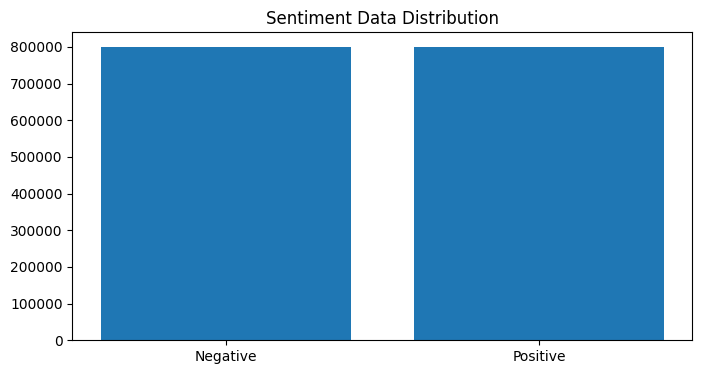

In [9]:
val_count = df.sentiment.value_counts()

plt.figure(figsize=(8,4))
plt.bar(val_count.index, val_count.values)
plt.title("Sentiment Data Distribution")

In [10]:
import random
random_idx_list = [random.randint(1,len(df.text)) for i in range(10)] # creates random indexes to choose from dataframe
df.loc[random_idx_list,:].head(10).style.set_properties(**{'background-color': '#f9f9f9', 'color': '#4CAF50', 'font-weight': 'bold'}) # Returns the rows with the index and display it

,sentiment,text
760436,Negative,"Dang, forgot kitty of the day again! Yeesh. Told you I was sick. Very sorry. For Monday: http://bit.ly/2zbtl7 What a cutie pie!"
1033337,Positive,@ddlovato wow! Demi really I can't wait 4 listen ur new album in special this song
908356,Positive,going to bed. night
389530,Negative,misses chad. http://plurk.com/p/yw4eo
359965,Negative,@NathanJager It's actually short for Theodoro. One of my favorites too! I'm jealous! I had a frozen Mexican dinner for lunch.
171181,Negative,On the way to the dentist.
220361,Negative,Going home tomorrow... on mothers day. Voy a extraï¿½ar NYC
714299,Negative,LaSt MiNuTe ShIt MiTe tAkE $$ aWaY 4rM mY tRiP nxT wK dAmN iTs aLwAyS s0MeN...
800440,Positive,"If I can make it to bed without running into a wall or tripping over my own feet, that is. Heh."
575973,Negative,I will love to death the lovely one that will give me the CD 'A Little Faster' on my birthday.


In [11]:
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [12]:
def preprocess(text, stem=False):
  text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
  tokens = []
  for token in text.split():
    if token not in stop_words:
      if stem:
        tokens.append(stemmer.stem(token))
      else:
        tokens.append(token)
  return " ".join(tokens)

In [13]:
df.text = df.text.apply(lambda x: preprocess(x))

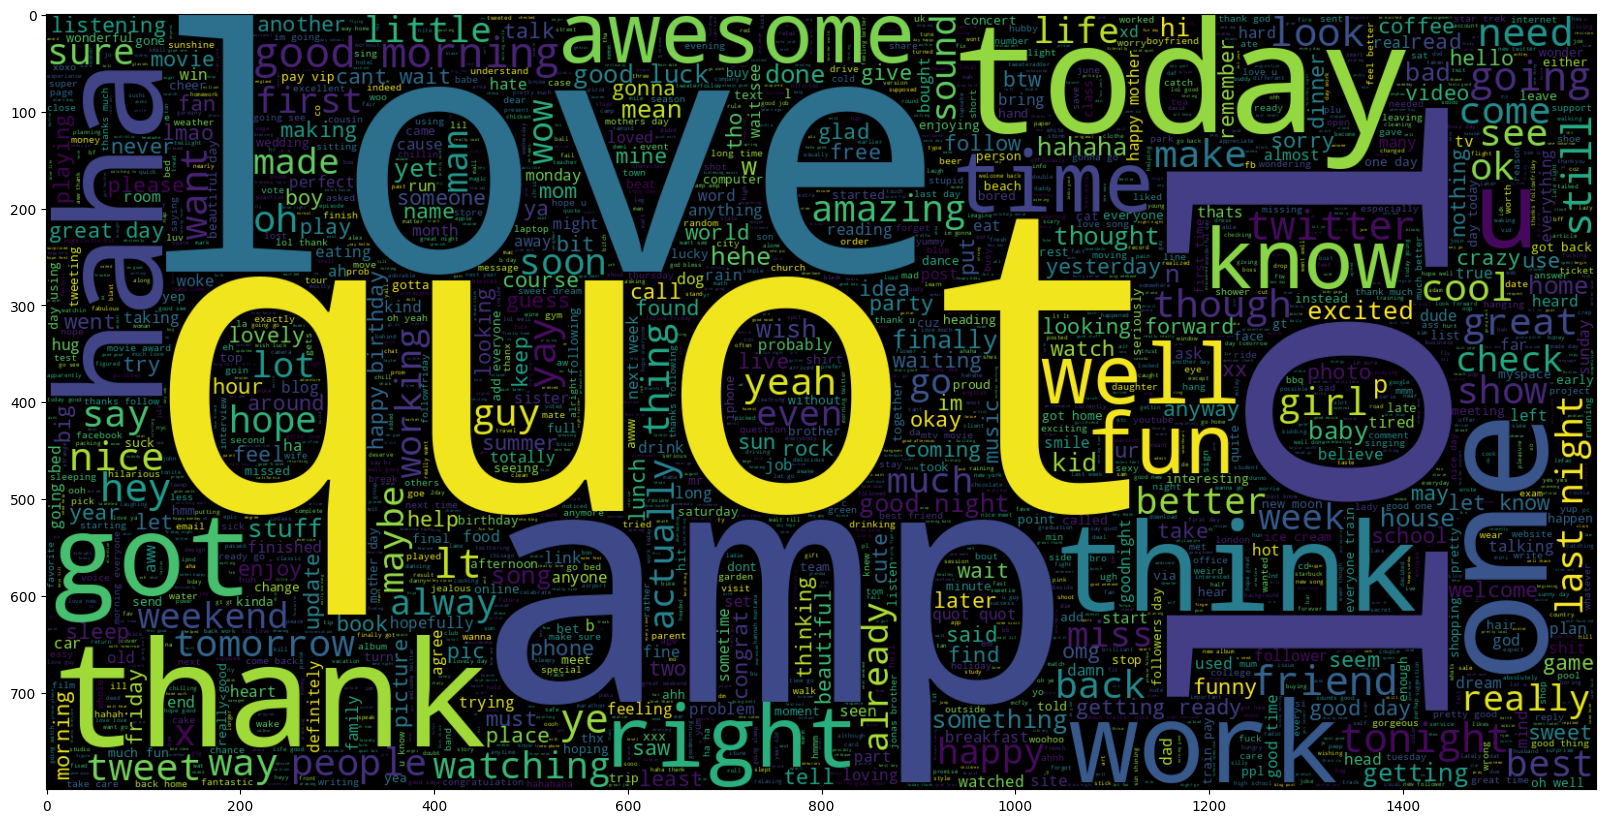

In [14]:
from wordcloud import WordCloud

plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.sentiment == 'Positive'].text))
plt.imshow(wc , interpolation = 'bilinear')

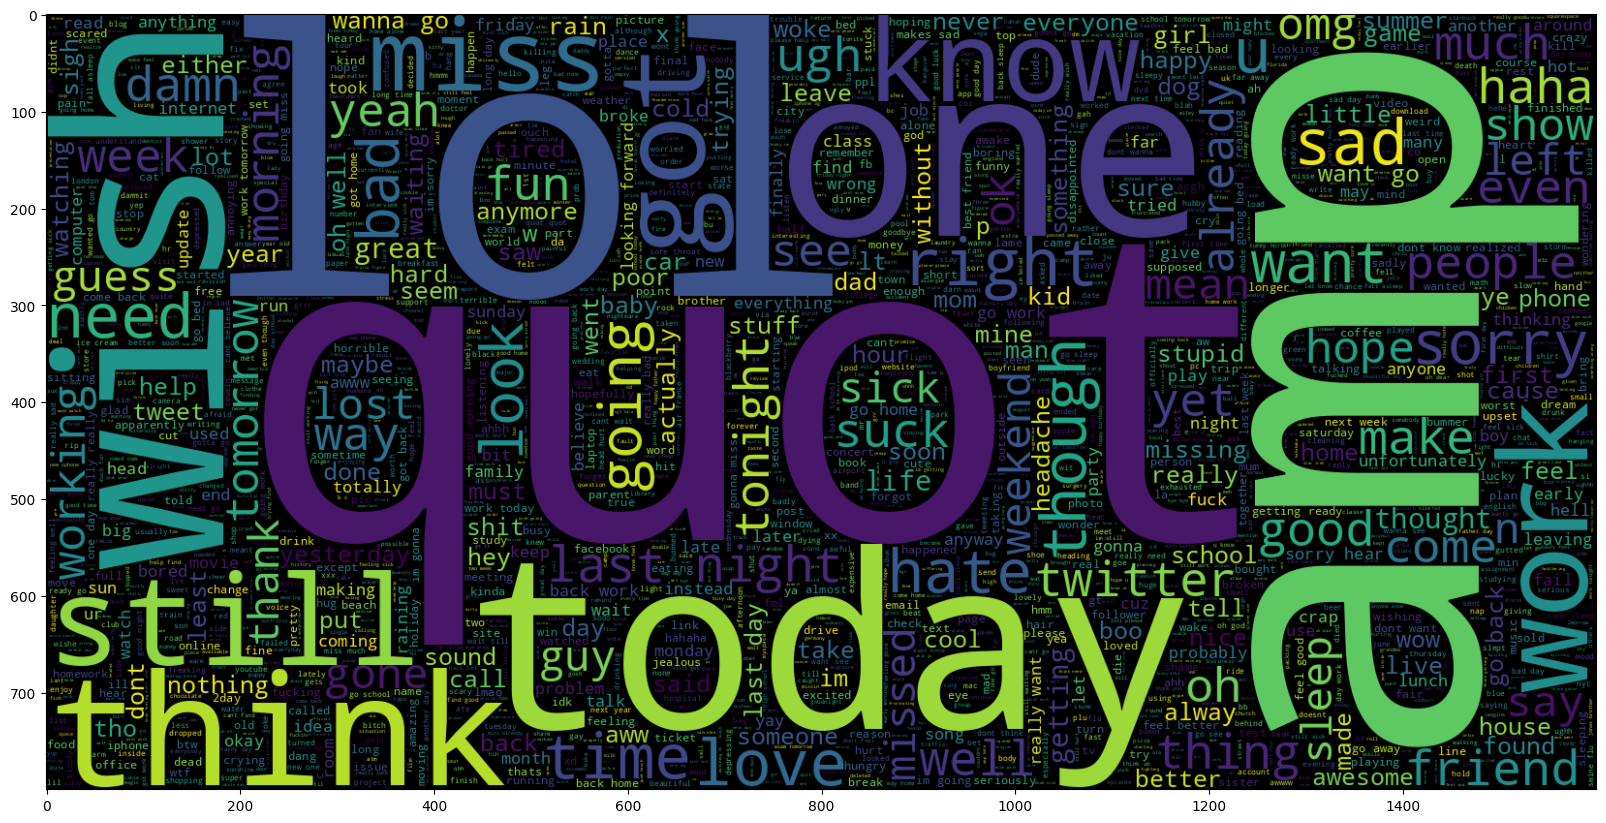

In [15]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.sentiment == 'Negative'].text))
plt.imshow(wc , interpolation = 'bilinear')

In [16]:
TRAIN_SIZE = 0.8
MAX_NB_WORDS = 100000
MAX_SEQUENCE_LENGTH = 30

In [17]:
train_data, test_data = train_test_split(df, test_size=1-TRAIN_SIZE,
                                         random_state=7) # Splits Dataset into Training and Testing set
print("Train Data size:", len(train_data))
print("Test Data size", len(test_data))

Train Data size: 1280000
Test Data size 320000


In [18]:
train_data.sample(10).style.set_properties(**{'background-color': '#f9f9f9', 'color': '#4CAF50', 'font-weight': 'bold'}) # Returns the rows with the index and display it

,sentiment,text
1203249,Positive,thanks panasyncolten follow teenscene cool stuff mtv movie awards
1449032,Positive,thanks lennon always fav among em
1405823,Positive,even better love life amp rich wud kinds dope deserve
253416,Negative,fecking cold pissing
778955,Negative,th thot takng nyc trains scares ppl w signs lyk quot hav tb quot coff coff yikes germs
657257,Negative,takin k get shots poor little guy bbl
458579,Negative,lakers win
953965,Positive,sometimes get followcost interesting little app apparently 71 tweets replies
917504,Positive,baked dinner yummy cant wait new short stack tv kind dips shall
1089573,Positive,awww tell em flippin love em ladies please


In [19]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data.text)

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)

Vocabulary Size : 290575


In [20]:
from keras.preprocessing.sequence import pad_sequences

x_train = pad_sequences(tokenizer.texts_to_sequences(train_data.text),
                        maxlen = MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(test_data.text),
                       maxlen = MAX_SEQUENCE_LENGTH)

print("Training X Shape:",x_train.shape)
print("Testing X Shape:",x_test.shape)

Training X Shape: (1280000, 30)
Testing X Shape: (320000, 30)


In [21]:
labels = train_data.sentiment.unique().tolist()

In [22]:
encoder = LabelEncoder()
encoder.fit(train_data.sentiment.to_list())

y_train = encoder.transform(train_data.sentiment.to_list())
y_test = encoder.transform(test_data.sentiment.to_list())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (1280000, 1)
y_test shape: (320000, 1)


In [23]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2024-06-11 15:19:33--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-06-11 15:19:33--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-06-11 15:19:34--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [26]:
GLOVE_EMB = '/content/glove.6B.300d.txt'
EMBEDDING_DIM = 300
LR = 1e-3
BATCH_SIZE = 1024
EPOCHS = 50
MODEL_PATH = '/content'

In [27]:
embeddings_index = {}

f = open(GLOVE_EMB)
for line in f:
  values = line.split()
  word = value = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' %len(embeddings_index))

Found 400000 word vectors.


In [28]:
embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
for word, i in word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [29]:
embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                          EMBEDDING_DIM,
                                          weights=[embedding_matrix],
                                          input_length=MAX_SEQUENCE_LENGTH,
                                          trainable=False)

In [30]:
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint

In [31]:
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
x = SpatialDropout1D(0.2)(embedding_sequences)
x = Conv1D(64, 5, activation='relu')(x)
x = Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2))(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(sequence_input, outputs)

In [32]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 30)]              0         
                                                                 
 embedding (Embedding)       (None, 30, 300)           87172500  
                                                                 
 spatial_dropout1d (Spatial  (None, 30, 300)           0         
 Dropout1D)                                                      
                                                                 
 conv1d (Conv1D)             (None, 26, 64)            96064     
                                                                 
 bidirectional (Bidirection  (None, 128)               66048     
 al)                                                             
                                                                 
 dense (Dense)               (None, 512)               66048 

In [33]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

model.compile(optimizer=Adam(learning_rate=LR), loss='binary_crossentropy',
              metrics=['accuracy'])
ReduceLROnPlateau = ReduceLROnPlateau(factor=0.1,
                                     min_lr = 0.01,
                                     monitor = 'val_loss',
                                     verbose = 1)

In [34]:
print("Training on GPU...") if tf.test.is_gpu_available() else print("Training on CPU...")

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


Training on CPU...


In [37]:
history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=6,
                    validation_data=(x_test, y_test), callbacks=[ReduceLROnPlateau])

Epoch 1/6
1250/1250 [==============================] - 1751s 1s/step - loss: 0.5049 - accuracy: 0.7499 - val_loss: 0.4789 - val_accuracy: 0.7676 - lr: 0.0010
Epoch 2/6
1250/1250 [==============================] - 1757s 1s/step - loss: 0.4851 - accuracy: 0.7637 - val_loss: 0.4693 - val_accuracy: 0.7742 - lr: 0.0010
Epoch 3/6
1250/1250 [==============================] - 1722s 1s/step - loss: 0.4758 - accuracy: 0.7703 - val_loss: 0.4659 - val_accuracy: 0.7758 - lr: 0.0010
Epoch 4/6
1250/1250 [==============================] - 1701s 1s/step - loss: 0.4698 - accuracy: 0.7738 - val_loss: 0.4631 - val_accuracy: 0.7777 - lr: 0.0010
Epoch 5/6
1250/1250 [==============================] - 1694s 1s/step - loss: 0.4655 - accuracy: 0.7764 - val_loss: 0.4598 - val_accuracy: 0.7802 - lr: 0.0010
Epoch 6/6
1250/1250 [==============================] - 1647s 1s/step - loss: 0.4625 - accuracy: 0.7783 - val_loss: 0.4599 - val_accuracy: 0.7803 - lr: 0.0010


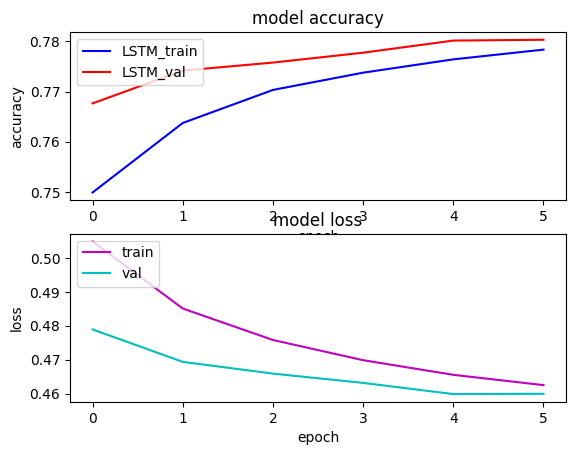

In [38]:
s, (at, al) = plt.subplots(2,1)
at.plot(history.history['accuracy'], c= 'b')
at.plot(history.history['val_accuracy'], c='r')
at.set_title('model accuracy')
at.set_ylabel('accuracy')
at.set_xlabel('epoch')
at.legend(['LSTM_train', 'LSTM_val'], loc='upper left')

al.plot(history.history['loss'], c='m')
al.plot(history.history['val_loss'], c='c')
al.set_title('model loss')
al.set_ylabel('loss')
al.set_xlabel('epoch')
al.legend(['train', 'val'], loc = 'upper left')

In [39]:
def decode_sentiment(score):
    return "Positive" if score>0.5 else "Negative"


scores = model.predict(x_test, verbose=1, batch_size=10000)
y_pred_1d = [decode_sentiment(score) for score in scores]

32/32 [==============================] - 110s 3s/step


In [40]:
import itertools
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=13)
    plt.yticks(tick_marks, classes, fontsize=13)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=17)
    plt.xlabel('Predicted label', fontsize=17)

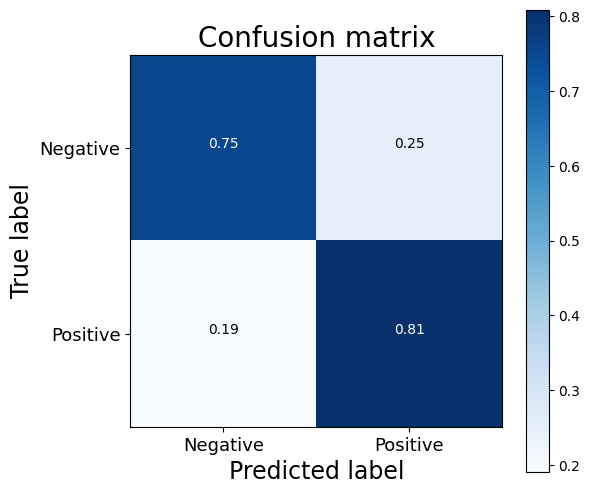

In [41]:
cnf_matrix = confusion_matrix(test_data.sentiment.to_list(), y_pred_1d)
plt.figure(figsize=(6,6))
plot_confusion_matrix(cnf_matrix, classes=test_data.sentiment.unique(), title="Confusion matrix")
plt.show()

In [42]:
print(classification_report(list(test_data.sentiment), y_pred_1d))

              precision    recall  f1-score   support

    Negative       0.80      0.75      0.77    160542
    Positive       0.76      0.81      0.79    159458

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000



# Conclusion:

In this project, we tackled the task of sentiment analysis for e-commerce using a Twitter dataset. Our aim was to create a deep learning-based solution to understand whether tweets expressed positive, negative, or neutral feelings.

We used the Sentiment140 dataset from Kaggle, which has lots of tweets labeled with sentiment. We tried different deep learning methods like CNNs, RNNs, and BERT to build our model, making it better at recognizing sentiment in tweets.

- This project helped us learn how to work with text data, design neural networks, and train models for sentiment analysis in e-commerce.

- For future work, we can try using different techniques to improve our model, like using better word representations or adding attention to capture context better.

- Overall, this project is a step towards making smarter e-commerce platforms, helping businesses understand what customers feel and making decisions based on that.